In [1]:

import sys
import pandas as pd 
import tensorflow as tf 
#import data_preparer
train_df = pd.read_csv('./Training_Data.csv') # 800 筆
test_df = pd.read_csv('./Testing_Data.csv') # 800 筆
print(train_df.columns)
print(test_df.columns)

Index(['DATA_DATE', 'IDX', 'LOT_ID', 'STATUS', 'CHIPNAME', 'LAYER',
       'REMAIN_LAYER_SEQ', 'PRIORITY', 'LOT_TYPE', 'WIP_QTY', 'WS_DATE',
       'IS_MAIN_ROUTE', '0I', '1C', '1D', '1F', '1G', '1I', '1M', '1N', '1P',
       '1T', '1U', '1V', '2D', '2E', '2F', '2I', '2M', '2N', '2P', '2T', '2U',
       '2V', '3D', '3E', '3G', '3I', '3K', '3M', '3N', '3P', '3S', '3T', '3U',
       '3V', '4D', '4E', '4I', '4M', '4N', '4T', '4U', '4V', '5D', '5E', '5I',
       '5M', '5N', '5P', '5S', '6D', '6I', '6N', '6P', '7D', '7I', '8D', '8I',
       '9D', 'DO', 'ES', 'GN', 'HR', 'LI', 'PO', 'PV', 'SP', 'SV', 'TM', 'TU',
       'TV', 'UG', 'ACTUAL_WP_OUT', 'out', 'in', 'cytime', 'remainDT',
       'WIPDT'],
      dtype='object')
Index(['DATA_DATE', 'IDX', 'LOT_ID', 'STATUS', 'CHIPNAME', 'LAYER',
       'REMAIN_LAYER_SEQ', 'PRIORITY', 'LOT_TYPE', 'WIP_QTY', 'WS_DATE',
       'IS_MAIN_ROUTE', '0I', '1C', '1D', '1F', '1G', '1I', '1M', '1N', '1P',
       '1T', '1U', '1V', '2D', '2E', '2F', '2I', '2M', '2

In [2]:
 #指定參數 axis = 0 表示要刪除觀測值（row），指定參數 axis = 1 表示要刪除欄位（column）。
train_df = train_df.drop(['DATA_DATE','IDX','0I', '1C', '1D', '1F', '1G', '1I', '1M', '1N', '1P',
       '1T', '1U', '1V', '2D', '2E', '2F', '2I', '2M', '2N', '2P', '2T', '2U',
       '2V', '3D', '3E', '3G', '3I', '3K', '3M', '3N', '3P', '3S', '3T', '3U',
       '3V', '4D', '4E', '4I', '4M', '4N', '4T', '4U', '4V', '5D', '5E', '5I',
       '5M', '5N', '5P', '5S', '6D', '6I', '6N', '6P', '7D', '7I', '8D', '8I',
       '9D', 'DO', 'ES', 'GN', 'HR', 'LI', 'PO', 'PV', 'SP', 'SV', 'TM', 'TU',
       'TV', 'UG','ACTUAL_WP_OUT', 'WS_DATE','out', 'in', 'cytime','WIPDT'], axis=1)  
print(train_df.columns)  
test_df = test_df.drop(['DATA_DATE','IDX','0I', '1C', '1D', '1F', '1G', '1I', '1M', '1N', '1P',
       '1T', '1U', '1V', '2D', '2E', '2F', '2I', '2M', '2N', '2P', '2T', '2U',
       '2V', '3D', '3E', '3G', '3I', '3K', '3M', '3N', '3P', '3S', '3T', '3U',
       '3V', '4D', '4E', '4I', '4M', '4N', '4T', '4U', '4V', '5D', '5E', '5I',
       '5M', '5N', '5P', '5S', '6D', '6I', '6N', '6P', '7D', '7I', '8D', '8I',
       '9D', 'DO', 'ES', 'GN', 'HR', 'LI', 'PO', 'PV', 'SP', 'SV', 'TM', 'TU',
       'TV', 'UG','ACTUAL_WP_OUT', 'WS_DATE','out', 'in', 'cytime','WIPDT'], axis=1)  
print(test_df.columns)         

Index(['LOT_ID', 'STATUS', 'CHIPNAME', 'LAYER', 'REMAIN_LAYER_SEQ', 'PRIORITY',
       'LOT_TYPE', 'WIP_QTY', 'IS_MAIN_ROUTE', 'remainDT'],
      dtype='object')
Index(['LOT_ID', 'STATUS', 'CHIPNAME', 'LAYER', 'REMAIN_LAYER_SEQ', 'PRIORITY',
       'LOT_TYPE', 'WIP_QTY', 'IS_MAIN_ROUTE', 'remainDT'],
      dtype='object')


In [3]:
print(train_df.shape)


print(test_df.shape)

print(#Requirement: All Numerical columns basic statistics.
train_df.describe())
print(test_df.describe())



(47983, 10)
(1015, 10)
       REMAIN_LAYER_SEQ      PRIORITY       WIP_QTY  IS_MAIN_ROUTE  \
count      47556.000000  47983.000000  47983.000000   47982.000000   
mean          11.902746      3.851031     24.094825       0.972073   
std            8.000682      0.580683      3.968701       0.164766   
min            1.000000      1.000000      1.000000       0.000000   
25%            6.000000      4.000000     25.000000       1.000000   
50%           10.000000      4.000000     25.000000       1.000000   
75%           16.000000      4.000000     25.000000       1.000000   
max           36.000000      4.000000     25.000000       1.000000   

           remainDT  
count  47983.000000  
mean      31.035679  
std       17.960177  
min        0.000000  
25%       16.000000  
50%       31.000000  
75%       45.000000  
max       80.000000  
       REMAIN_LAYER_SEQ     PRIORITY      WIP_QTY  IS_MAIN_ROUTE     remainDT
count       1005.000000  1015.000000  1015.000000    1015.000000  1015

In [4]:
#train_df.dropna(axis='REMAIN_LAYER_SEQ')
print(test_df.shape)
print(train_df.shape)
#train_df1=test_df.dropna(axis='REMAIN_LAYER_SEQ')
print(train_df.isnull().sum())
print(test_df.isnull().sum())

(1015, 10)
(47983, 10)
LOT_ID                0
STATUS                0
CHIPNAME              0
LAYER                 0
REMAIN_LAYER_SEQ    427
PRIORITY              0
LOT_TYPE              0
WIP_QTY               0
IS_MAIN_ROUTE         1
remainDT              0
dtype: int64
LOT_ID               0
STATUS               0
CHIPNAME             0
LAYER                0
REMAIN_LAYER_SEQ    10
PRIORITY             0
LOT_TYPE             0
WIP_QTY              0
IS_MAIN_ROUTE        0
remainDT             0
dtype: int64


In [5]:
# 刪除null值
train_df = train_df.dropna()
test_df = test_df.dropna()
#train_df.dropna(axis='REMAIN_LAYER_SEQ')
print(test_df.shape)
print(train_df.shape)
#train_df1=test_df.dropna(axis='REMAIN_LAYER_SEQ')
print(train_df.isnull().sum())
print(test_df.isnull().sum())

(1005, 10)
(47556, 10)
LOT_ID              0
STATUS              0
CHIPNAME            0
LAYER               0
REMAIN_LAYER_SEQ    0
PRIORITY            0
LOT_TYPE            0
WIP_QTY             0
IS_MAIN_ROUTE       0
remainDT            0
dtype: int64
LOT_ID              0
STATUS              0
CHIPNAME            0
LAYER               0
REMAIN_LAYER_SEQ    0
PRIORITY            0
LOT_TYPE            0
WIP_QTY             0
IS_MAIN_ROUTE       0
remainDT            0
dtype: int64


In [6]:
# print(train_df.info())
# print(test_df.info())
train_df['PRIORITY']=train_df['PRIORITY'].astype(str)
test_df['IS_MAIN_ROUTE']=test_df['IS_MAIN_ROUTE'].astype(str)
train_df['REMAIN_LAYER_SEQ']=train_df['REMAIN_LAYER_SEQ'].astype('int32')
test_df['REMAIN_LAYER_SEQ']=test_df['REMAIN_LAYER_SEQ'].astype('int32')
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47556 entries, 0 to 47982
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LOT_ID            47556 non-null  object 
 1   STATUS            47556 non-null  object 
 2   CHIPNAME          47556 non-null  object 
 3   LAYER             47556 non-null  object 
 4   REMAIN_LAYER_SEQ  47556 non-null  int32  
 5   PRIORITY          47556 non-null  object 
 6   LOT_TYPE          47556 non-null  object 
 7   WIP_QTY           47556 non-null  int64  
 8   IS_MAIN_ROUTE     47556 non-null  float64
 9   remainDT          47556 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1014
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LOT_ID            1005 non-null   object
 1   

In [7]:
 
# # 建立模型
# print("\n[Info] 建立模型")  
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense,Dropout
  
# model = Sequential()  
# #Dense 意思是這個神經層是全連線層
# # 輸入層
# #model.add(Dense(units=3, input_dim=1, kernel_initializer='uniform', activation='relu'))
# #model.add(Dense(units=17, input_dim=9, kernel_initializer='random_uniform', activation='relu'))
# model.add(Dense(units=3, input_shape=(train_features.shape[1],), kernel_initializer='uniform', activation='relu'))
# model.add(Dropout(0.1))

# # 隱藏層
# #model.add(Dense(units=5, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(units=20, kernel_initializer='random_uniform', activation='relu'))
# model.add(Dense(units=30, kernel_initializer='random_uniform', activation='relu'))
# model.add(Dense(units=40, kernel_initializer='random_uniform', activation='relu'))
# model.add(Dropout(0.2))
# # model.add(Dense(units=150, kernel_initializer='zeros', activation='relu'))
# # model.add(Dense(units=160, kernel_initializer='zeros', activation='relu'))
# # model.add(Dense(units=170, kernel_initializer='zeros', activation='relu'))

# # 輸出層
# model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
# #print("\n[Info] Show model summary...")  
# #model.summary()

In [8]:
 
test_df.columns



Index(['LOT_ID', 'STATUS', 'CHIPNAME', 'LAYER', 'REMAIN_LAYER_SEQ', 'PRIORITY',
       'LOT_TYPE', 'WIP_QTY', 'IS_MAIN_ROUTE', 'remainDT'],
      dtype='object')

In [9]:

# train_df = train_df.drop(['ACTUAL_WP_OUT','WS_DATE' , 'IS_MAIN_ROUTE','ACTUAL_WP_OUT' ,'out','in','cytime','WIPDT'], axis=1)  
# print(train_df.columns)  
# test_df = test_df.drop(['ACTUAL_WP_OUT','WS_DATE', 'IS_MAIN_ROUTE','ACTUAL_WP_OUT' ,'out','in','cytime','WIPDT'], axis=1)  
# print(test_df.columns) 

In [10]:
# # 將特徵欄位進行標準化 

# 原始資料是有序離散值的話 => Label Encoding
# 原始資料是無序離散值的話 => One Hot Encoding (Dummies)
from sklearn import preprocessing  
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
labelEncoder = preprocessing.LabelEncoder()
#'LOT_ID', 'STATUS', 'CHIPNAME', 'LAYER', 'REMAIN_LAYER_SEQ', 'PRIORITY','LOT_TYPE', 'WIP_QTY', 'IS_MAIN_ROUTE', 'remainDT'
#1.label Encoder 手動轉換  自己製作STATUS
STATUS_mapping={'WAITING':0,'PROCESSING':1}
train_df['STATUS']=train_df['STATUS'].map(STATUS_mapping)
test_df['STATUS']=test_df['STATUS'].map(STATUS_mapping)

#2.label Encoder 自動轉換 
category_col =['LOT_ID','CHIPNAME', 'LAYER','LOT_TYPE'] 

# 大部分的模型都是基於數學運算，字串無法套入數學模型進行運算，在此先對其進行Label encoding編碼，我們從 sklearn library中導入 LabelEncoder class，對第一行資料進行fit及transform並取代之
for col in category_col:
    train_df[col] = labelEncoder.fit_transform(train_df[col])
for col in category_col:
    test_df[col] = labelEncoder.fit_transform(test_df[col])

#One hot encoding  使用Pandas進行   
# get_dummies可以直接轉字串，反而無法轉換數字
# get_dummies沒指定columns，會全部轉換
# category_col_1 =[ 'STATUS', 'CHIPNAME', 'LAYER', 'REMAIN_LAYER_SEQ', 'PRIORITY',
#        'LOT_TYPE', 'IS_MAIN_ROUTE']            
train_df = pd.get_dummies(train_df) #, columns=category_col_1, drop_first=True
test_df = pd.get_dummies(test_df) #, columns=category_col_1, drop_first=True
# onehotencoder = OneHotEncoder()
# data_str_ohe=onehotencoder.fit_transform(train_df).toarray()
# train_df = pd.DataFrame(data_str_ohe)

#=============================================
# le=LabelEncoder()
# for col in train_df[[ 'STATUS', 'CHIPNAME', 'LAYER','PRIORITY', 'LOT_TYPE' ]]:
#     train_df[col]=le.fit_transform(train_df[col])
#     test_df[col]=le.fit_transform(test_df[col])
    


In [11]:
# 進行訓練
 
# 將 dataframe 轉換為 array
ndarray = train_df.values  
# print("\n[Info] Translate into ndarray(%s) with shape=%s" % (ndarray.__class__, str(ndarray.shape)))  
# print("\n[Info] Show top 2 records:\n%s\n" % (ndarray[:2]))  
# print("\n[Info] ndarray:")
print('ndarray=>',ndarray)

# Separate labels with features  
train_labels = ndarray[:,9]    # Labels are the values we want to predict
train_features = ndarray[:,:9] # Remove the labels from the features
# 將 dataframe 轉換為 array
ndarray = test_df.values  
# print("\n[Info] Translate into ndarray(%s) with shape=%s" % (ndarray.__class__, str(ndarray.shape)))  
# print("\n[Info] Show top 2 records:\n%s\n" % (ndarray[:2]))  
# print("\n[Info] ndarray:")
print('ndarray=>',ndarray)

# Separate labels with features  
test_labels = ndarray[:,9]    # Labels are the values we want to predict
test_features = ndarray[:,:9] # Remove the labels from the features


# #numeric_features = train_df.select_dtypes(include=['numeric'])
print('test_labels=>',test_labels)
print('test_features=>',test_features)

ndarray=> [[0.000e+00 0.000e+00 1.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [2.000e+00 1.000e+00 1.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [3.000e+00 0.000e+00 2.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 ...
 [2.108e+03 1.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.109e+03 0.000e+00 3.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.110e+03 0.000e+00 1.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]]
ndarray=> [[  0   0   1 ...   2   0   1]
 [  1   0   1 ...  24   0   1]
 [  2   0   2 ...  34   0   1]
 ...
 [974   1   2 ...  30   0   1]
 [975   0   0 ...  32   0   1]
 [976   0   2 ...  36   0   1]]
test_labels=> [0 0 0 ... 0 0 0]
test_features=> [[  0   0   1 ...   0   1   2]
 [  1   0   1 ...   0   1  24]
 [  2   0   2 ...   0   1  34]
 ...
 [974   1   2 ...   1  25  30]
 [975   0   0 ...   1  25  32]
 [976   0   2 ...   1  25  36]]


In [12]:
#rescaling 特徵縮放(0~1) 特徵最小/全距
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))  
train_features = minmax_scale.fit_transform(train_features)  

test_features = minmax_scale.fit_transform(test_features)  

# FS_1= preprocessing.MinMaxScaler().fit(train_features)
# result_minmax= FS_1.transform(train_features)

In [13]:
# enc=OneHotEncoder()
# train_df_ohe=enc.fit_transform(train_df).toarray()
# pd.DataFrame(train_df_ohe)

# test_df_ohe=enc.fit_transform(test_df).toarray()
# pd.DataFrame(test_df_ohe)

In [14]:
 
# 建立模型
print("\n[Info] 建立模型")  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
  
model = Sequential()  
#Dense 意思是這個神經層是全連線層
# 輸入層
#model.add(Dense(units=3, input_dim=1, kernel_initializer='uniform', activation='relu'))
#model.add(Dense(units=17, input_dim=9, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(units=3, input_shape=(train_features.shape[1],), kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.1))

# 隱藏層
#model.add(Dense(units=5, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=20, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(units=30, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(units=40, kernel_initializer='random_uniform', activation='relu'))
model.add(Dropout(0.2))
# model.add(Dense(units=150, kernel_initializer='zeros', activation='relu'))
# model.add(Dense(units=160, kernel_initializer='zeros', activation='relu'))
# model.add(Dense(units=170, kernel_initializer='zeros', activation='relu'))

# 輸出層
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
print("\n[Info] Show model summary...")  
model.summary()


[Info] 建立模型

[Info] Show model summary...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 30        
_________________________________________________________________
dropout (Dropout)            (None, 3)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 30)                630       
_________________________________________________________________
dense_3 (Dense)              (None, 40)                1240      
_________________________________________________________________
dropout_1 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_4 (Dens

In [15]:
#train_labels.astype('float64')

In [16]:
print("\n[Info] 訓練中...")  
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  
early_stopping = tf.keras.callbacks.EarlyStopping(patience=25)
train_history = model.fit(x=train_features, y=train_labels, validation_split=0.1, epochs=200, batch_size=30, verbose=2) 

 - loss: 0.0992 - accuracy: 0.9660 - val_loss: 0.1070 - val_accuracy: 0.9592
Epoch 14/200
42800/42800 - 2s - loss: 0.0978 - accuracy: 0.9660 - val_loss: 0.1116 - val_accuracy: 0.9592
Epoch 15/200
42800/42800 - 3s - loss: 0.0982 - accuracy: 0.9660 - val_loss: 0.1125 - val_accuracy: 0.9592
Epoch 16/200
42800/42800 - 3s - loss: 0.0984 - accuracy: 0.9660 - val_loss: 0.1096 - val_accuracy: 0.9592
Epoch 17/200
42800/42800 - 4s - loss: 0.0973 - accuracy: 0.9660 - val_loss: 0.1104 - val_accuracy: 0.9592
Epoch 18/200
42800/42800 - 3s - loss: 0.0987 - accuracy: 0.9660 - val_loss: 0.1197 - val_accuracy: 0.9592
Epoch 19/200
42800/42800 - 3s - loss: 0.0991 - accuracy: 0.9660 - val_loss: 0.1094 - val_accuracy: 0.9592
Epoch 20/200
42800/42800 - 4s - loss: 0.0990 - accuracy: 0.9660 - val_loss: 0.1219 - val_accuracy: 0.9592
Epoch 21/200
42800/42800 - 3s - loss: 0.0982 - accuracy: 0.9660 - val_loss: 0.1085 - val_accuracy: 0.9592
Epoch 22/200
42800/42800 - 3s - loss: 0.0982 - accuracy: 0.9660 - val_loss:

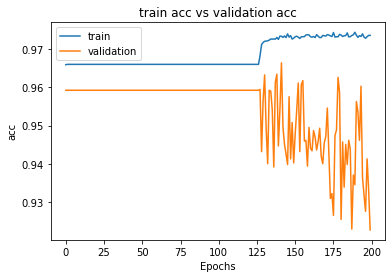

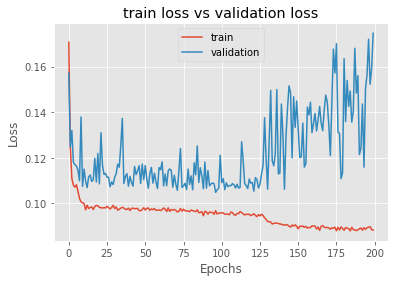

In [17]:

import matplotlib.pyplot as plt

def acc_draw(hist):
    plt.plot(hist.history['accuracy'], label = 'train')
    plt.plot(hist.history['val_accuracy'], label = 'validation')
    plt.title("train acc vs validation acc")
    plt.xlabel("Epochs")
    plt.ylabel("acc")
    plt.legend()
    plt.show()
def loss_draw(hist):
    plt.style.use('ggplot')
    plt.plot(hist.history['loss'], label = 'train')
    plt.plot(hist.history['val_loss'], label='validation')
    plt.title("train loss vs validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
acc_draw(train_history)    
loss_draw(train_history) 
# val 代表 validation，test_loss 才是测试集的 loss。

In [18]:
#準確率
scores=model.evaluate(test_features,test_labels,verbose=0)

scores[1]


0.95920396

In [19]:
#進行預測
prediction=model.predict_classes(test_features)

prediction

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [20]:
# all_probability = model.predict(test_features)  
# all_df.insert(len(all_df.columns), 'probability', all_probability) # 加入 生存機率 欄位
# all_df